# 課題ではMINISTになっていましたが，MNISTではないですか？

# 手書き文字の分類

MNISTのデータは、手書きで書かれた数字を画像にした画像データ(image)と、その画像に書かれた数字を表すラベルデータ(label)から構成されます。

![](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=FalseでDataFrame型ではなくndarray型で読み込む

sklearn.datasetsを通じでMNISTをndarray型でデータが読み込まれます。
- ```data```キーは、インスタンスごと１行、特徴量ごとに1列という形の配列を格納する
- ```label``` キーは、ラベルの配列を格納する

In [3]:
print(mnist.data.shape) # (70000, 784) 70000枚の画像データ、1枚あたり28×28=784の画素データ
print(mnist.target.shape) # (70000,) 70000枚の画像データに対応するラベルデータ

(70000, 784)
(70000,)


つまり、70000個の画像データがあり、個々の画像には784個の特徴量があります。

各画像が$28 \times 28$ピクセルで、 個々の特徴量は$0$(白)から255(黒)までの値でピクセルの明度を表しています。

以下は、$0$番目のインスタンスの特徴量ベクトルを取り出して、$28 \times 28$配列の形に変換し、可視化すると、$5$のように見える数字が確認できます。

対応する$0$番目のラベルデータを確認すると、ラベルは$5$であることがわかりました。

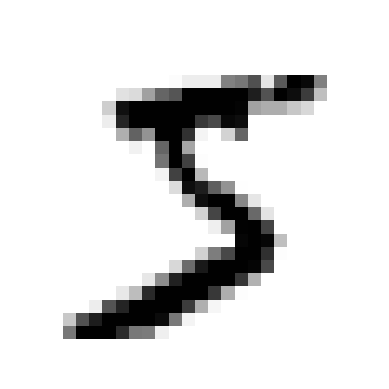

In [4]:
import matplotlib.pyplot as plt

some_digit = mnist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
# 対応するラベルデータ
mnist.target[0] # 5

'5'

MNISTデータを用いて、手書き数字を識別機械学習モデルを構築、評価しなさい。

# ここから
まずはデータの確認

In [6]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
# あれこれimportする
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sbn
from sklearn.model_selection import cross_val_score as cv

In [8]:
# データ分割
X = mnist.data # 特徴量データ
y = mnist.target # ラベルデータ

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
# モデルの設定
model = svm.SVC()

In [10]:
model.fit(X_train, y_train)

SVC()

In [11]:
# テストデータの当てはめ
y_predicted = model.predict(X_test)

In [12]:
accuracy_score(y_test, y_predicted) # 予測精度（accuracy）の評価

0.9784285714285714

<AxesSubplot:>

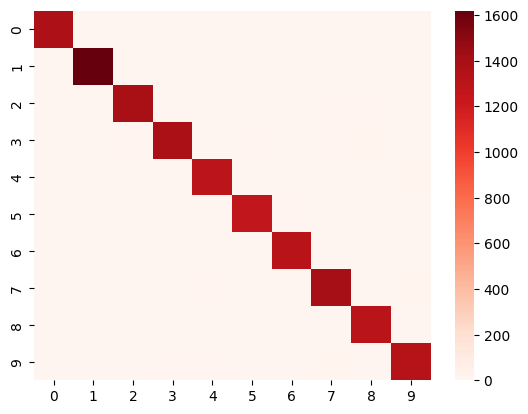

In [13]:
# 予測結果の可視化
sbn.heatmap( confusion_matrix(y_test, y_predicted) , cmap = "Reds")